In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

# Models
import Models.LatentFactorModels 
import Simulators.Simulator 
import Models.ModelComparer 
import numpy as np
import sklearn

import pandas as pd
pd.set_option('max_rows', 15)
import seaborn as sns

# Assessment Machinery
eval_base_dir = os.path.join(base_dir, os.pardir, "CancerDimensionalityReduction")
sys.path.append(eval_base_dir)

import Performance.classification.CrossValidation 

# Logging
import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

/home/ijoseph/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import datetime
start_time = datetime.datetime.now()
print "Starting at", start_time

Starting at 2016-11-07 12:33:24.740256


# Set Parameters

In [4]:
N = 30
p_1, p_2 = int(5e5), int(2e4)
psiMean, wMean = (2,4)

# Simulate

In [5]:
(m, p_0, p_3) = (2,3,1)
genModel = Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)

In [6]:
_ = genModel.initializeParameters(psiMean = psiMean, wMean=wMean, warm_start=False)
simulator = Simulators.Simulator.Simulator(genModel)

In [7]:
np.random.seed(seed=150)
genModel = simulator.simulate(int(N))

INFO:root:Simulating 30 points with 23 processors
INFO:root:16 cpus do 1, 7 cpus do 2. Prepping models...
INFO:root:Done prepping models. Mapping...


[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.5min remaining:   -3.8s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.6min remaining:   -4.0s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.7min remaining:   -4.1s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.7min remaining:   -4.2s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.7min remaining:   -4.2s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.7min remaining:   -4.3s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.7min remaining:   -4.3s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.8min remaining:   -4.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.8min remaining:   -4.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.8min remaining:   -4.4s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.8min remaining:   -4.5s
[Parallel(n_jobs=23)]: Done  24 out of  23 | elapsed:  1.8min remaining:   -4.5s
[Parallel(n_jobs=23)]: Done 

Only takes a few minutes to save data into a feather like this. 

In [8]:
folder = "n_{0}_p_{1}_psi_{2}_W_{3}".format(N, p_1 + p_2 + p_3, psiMean, wMean)
print "saving in", folder

saving in n_30_p_520001_psi_2_W_4


In [ ]:
genModel.save_data(folder)

# Cross Validation 

In [ ]:
dfc = Performance.classification.CrossValidation.DataFrameCollection(
    dependent_data=genModel.getY(), independent_data=genModel.getX())
print "N = {0}".format(dfc.independentDF.shape[0])

## MFAA

In [17]:
cv_mfaa = Performance.classification.CrossValidation.CrossValidation(
    predictorClass=Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3),
                                                         dataFrameCollection=dfc,k =10)

cv_mfaa.cross_validate()
cv_mfaa.output_results()

MemoryError: 

mean accuracy score nan, standard error nan
INFO:root:All accuracy scores: []
mean sensitivity nan, standard error nan
INFO:root:All sensitivity scores: []
mean specificity nan, standard error nan
INFO:root:All specificity scores: []
mean precision nan, standard error nan
INFO:root:All precision scores: []f


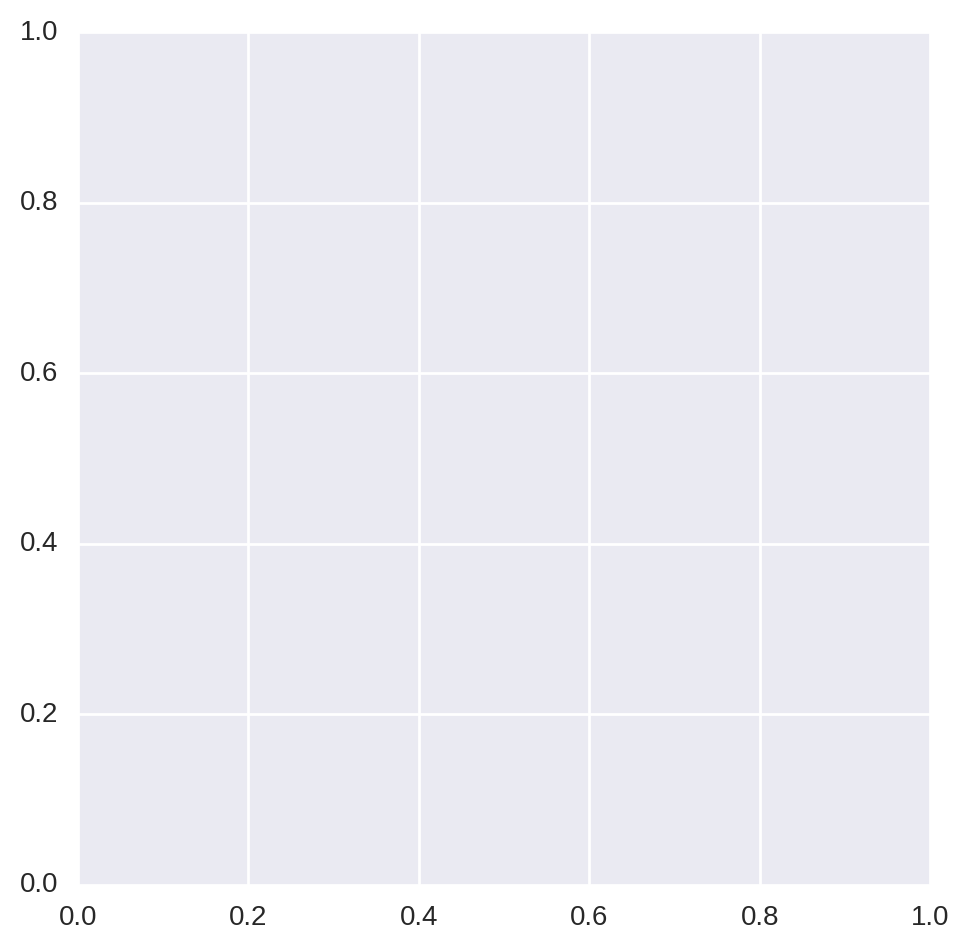

In [19]:
cv_mfaa.output_results()

In [13]:
stop_time = datetime.datetime.now()
print "Stopped at", stop_time

 Stopped at 2016-11-10 17:17:29.773810


In [14]:
print "Elapsed (h:m:s)", stop_time - start_time

Elapsed (h:m:s) 3 days, 4:44:05.033554
